  <font color=#0B5345 size = 12 face="Georgia">  Phase I </font>
  
  <font color=#1A998 size = 6 face="Georgia">  Group Members </font>
  
  Dekhil Nour
  
  Mazigh Arij
  
  Nasri Chirine
  
  Benmoussa Yacine
  
  Medimegh Mohamed

 <font color=#1A998 size = 6 face="Georgia">  Class </font> 
 
 4DS6
 
 <font color=#1A998 size = 6 face="Georgia">  Project's Topic </font>
 
 Application for the automatic generation of car insurance

# Libraries Import

In [1]:
import scipy.misc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from skimage.io import imread, imshow
import pytesseract
from os import listdir
from os.path import isfile, join
import numpy
import cv2
import argparse
from PIL import Image
import glob 

# Data understanding

![](data.JPG)

# CINs and GrayCards Database Import

 <font color=#6A098 size = 5 face="Georgia"> We imported the collected images of CINs and Gray Cards and stocked them in "images" using numpy and cv2

In [2]:
mypath= r'C:/Users/USER/Desktop/images'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images = numpy.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
    images[n] = cv2.imread(join(mypath,onlyfiles[n]))

# Anomalies Detection

## Size 

In [3]:
size = [None] * len(onlyfiles)
# Putting images size in list "size" 
for n in range(0, len(onlyfiles)):
    s=images[n].size
    size[n]=s

Text(0.5, 1.0, 'Image size')

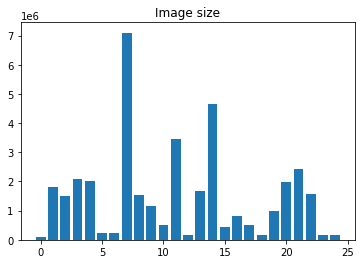

In [4]:
f=range(len(size))
plt.bar(f,size)
plt.title('Image size')

## Shape

In [5]:
shape = [None] * len(onlyfiles)
for n in range(0, len(onlyfiles)):
    s=images[n].shape
    shape [n]=s

In [6]:
shape

[(128, 231, 3),
 (900, 675, 3),
 (816, 612, 3),
 (720, 960, 3),
 (709, 945, 3),
 (221, 352, 3),
 (221, 352, 3),
 (1155, 2048, 3),
 (960, 528, 3),
 (540, 720, 3),
 (343, 500, 3),
 (1600, 720, 3),
 (259, 194, 3),
 (576, 960, 3),
 (1080, 1440, 3),
 (300, 500, 3),
 (401, 664, 3),
 (360, 480, 3),
 (259, 194, 3),
 (459, 720, 3),
 (608, 1080, 3),
 (1040, 780, 3),
 (546, 960, 3),
 (194, 259, 3),
 (175, 288, 3)]

 <font color=#6A098 size = 5 face="Georgia"> We can notice based on the barplot and the shapes the big differences in images, what makes recizing them a necessity in this case. </font>

## Angle

In [7]:
#this function detects the angle of the text in the image
def angle (image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)

    thresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]


    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]

    print(angle)

In [8]:
#Comparing images angles
for n in range(0, len(onlyfiles)):
    angle(images[n])

90.0
90.0
90.0
90.0
90.0
-0.0
-0.0
0.0
90.0
90.0
0.8263241052627563
90.0
90.0
90.0
90.0
0.0
90.0
90.0
90.0
90.0
90.0
0.0
90.0
90.0
0.8069294691085815


 <font color=#6A098 size = 5 face="Georgia"> We can see that not all the images are in the right angle which makes the data extarcting not exact that's why we have to put all the images in right angle's degree. </font>

## Brightness

In [9]:
#This function detects the brightness of each image
def bright(imag):
    imag = Image.fromarray(imag)
    imag = imag.convert ('RGB')
    
 #coordinates of the pixel
    X,Y = 0,0
 #Get RGB
    pixelRGB = imag.getpixel((X,Y))
    R,G,B = pixelRGB
    brightness = sum([R,G,B])/3 ##0 is dark (black) and 255 is bright (white)
    print(brightness)
    return  brightness

In [10]:
#Brightness variation list
liste = [None] * len(onlyfiles)
for n in range(0, len(onlyfiles)):
    s=bright(images[n])
    liste [n]=s

193.0
39.333333333333336
129.0
5.666666666666667
19.666666666666668
11.0
11.0
152.66666666666666
10.0
117.0
255.0
0.0
16.0
35.0
6.0
199.66666666666666
21.666666666666668
143.66666666666666
209.0
220.0
18.333333333333332
195.33333333333334
86.66666666666667
38.0
226.66666666666666


Text(0.5, 1.0, 'Image s Brightness')

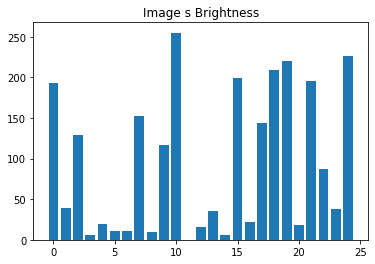

In [11]:
#brightness plot
f=range(len(liste))
plt.bar(f,liste)
plt.title('Image s Brightness')

<font color=#6A098 size = 5 face="Georgia"> Refering to the previous results, it's clear that the brightness vary from a picture to an other. Both hight and low brightness may effect the process of data extraction.

## Blur

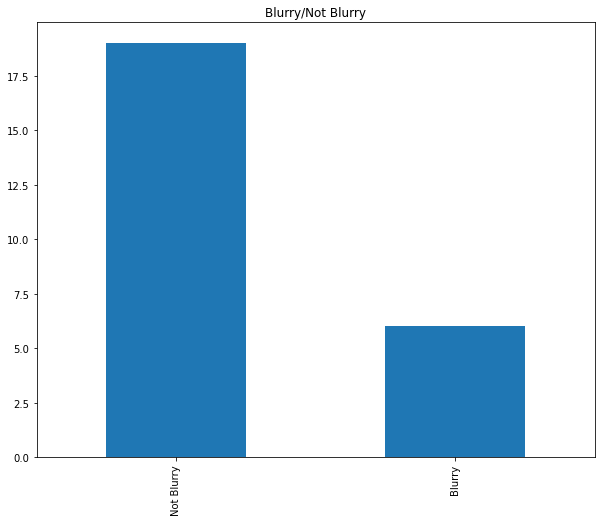

In [12]:
#Calling the file blur-detection.py in which we find the necessary functions to classify images(blurry/not blurry).
%run blur-detection.py --images images

<font color=#6A098 size = 5 face="Georgia"> As we can see in the plot, we have an important number of blurry images.

# Shapes detection 

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
# reading image
img = cv2.imread('C:/Users/USER/Desktop/1.png')
  
# converting image into grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# setting threshold of gray image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
  
# using a findContours() function
contours, _ = cv2.findContours(
    threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  
i = 0
sizeOfShapes = []
# list for storing names of shapes
for contour in contours:
  
    # here we are ignoring first counter because 
    # findcontour function detects whole image as shape
    if i == 0:
        i = 1
        continue
  
    # cv2.approxPloyDP() function to approximate the shape
    approx = cv2.approxPolyDP(
        contour, 0.01 * cv2.arcLength(contour, True), True)
    
    sizeOfShapes.append(cv2.arcLength(contour, True))
   
    # using drawContours() function
    cv2.drawContours(img, [contour], 0, (255, 255, 255), 3)
  
    # finding center point of shape
    M = cv2.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10']/M['m00'])
        y = int(M['m01']/M['m00'])
   
  
# displaying the image after drawing contours
cv2.imshow('shapes', img)
  
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
max(sizeOfShapes)

1647.7817443609238

Output : 

![](exple.JPG)

<font color=#6A098 size = 5 face="Georgia"> We tried to find the different shapes existant in the images and based on that we managed to detect the biggest shape that we may use to facilitate cropping the image.

# Predection dataset

<font color=#6A098 size = 5 face="Georgia"> Our dataset was collected thanks to the scrapping from different websites such as automobile.tn and tayara.tn

In [15]:
# Importing the Credit Card Default Dataset
dataset = pd.read_excel (r'run_results1.xlsx')

In [16]:
#diplaying the dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               184 non-null    object
 1   prix               184 non-null    int64 
 2   year               184 non-null    int64 
 3   kms                184 non-null    int64 
 4   carrosserie        184 non-null    object
 5   puissance_fiscale  184 non-null    int64 
 6   energy             184 non-null    object
dtypes: int64(4), object(3)
memory usage: 10.2+ KB


In [17]:
print(dataset.shape)

(184, 7)


In [18]:
# Displaying statistics 
dataset.describe()

,prix,year,kms,puissance_fiscale
count,184.000000,184.000000,184.000000,184.000000
mean,155000.000000,2014.195652,123605.978261,9.038043
std,53260.366753,3.838941,64295.814115,5.855609
min,63500.000000,1997.000000,700.000000,4.000000
25%,109250.000000,2012.000000,80000.000000,5.000000
50%,155000.000000,2015.000000,116500.000000,7.000000
75%,200750.000000,2017.000000,155250.000000,10.000000
max,246500.000000,2022.000000,360000.000000,47.000000


In [19]:
#checking if there's any NaN values
dataset.isnull().values.any()

False

In [20]:
#checking the number of NaN values
dataset.isnull().sum().sum()

0